<center><font size="5">Extracción de Datos del Censo de los Estados Unidos (API)</font></center>

Introducción:  
Este script de Python extrae datos demográficos de la API del Censo de los Estados Unidos para los estados de Florida, Pensilvania y Tennessee. La información recopilada incluye la población total por año.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [15]:
census_api_key= "17f4105acff4d5b11a1e0c696bc21e9952b0f5da"
variable = 'B01001_001E'
year = '2020'

In [16]:
# Datos nacionales

url = 'https://api.census.gov/data/{0}/acs/acs5?get=NAME,{1}&for=us:*&key={2}'\
  .format(year, variable, census_api_key)
# request
response = requests.request("GET", url)
# status code
response.status_code

200

In [17]:
# verificacion de datos
response.text

'[["NAME","B01001_001E","us"],\n["United States","326569308","1"]]'

In [18]:
# transformamos a objeto json
response.json() 

[['NAME', 'B01001_001E', 'us'], ['United States', '326569308', '1']]

National Region


In [19]:
# convertimos a dataframe
df_national = pd.DataFrame(response.json()[1:], columns=response.json()[0])
df_national

,NAME,B01001_001E,us
0,United States,326569308,1


In [20]:
# renombramos columnas
df_national = df_national.rename(columns={'B01001_001E': 'total_population'})
df_national

,NAME,total_population,us
0,United States,326569308,1


In [21]:
# Obtenemos datos por estado
url = 'https://api.census.gov/data/{0}/acs/acs5?get=NAME,{1}&for=state:*&key={2}'\
  .format(year, variable, census_api_key)
response = requests.request("GET", url)
response.status_code

200

State Region


In [22]:
# Obteneos datos de población
df_state = pd.DataFrame(response.json()[1:], columns=response.json()[0])\
  .rename(columns={'B01001_001E': 'total_population'})
print('Num of rows:', len(df_state))
df_state.head()

Num of rows: 52


,NAME,total_population,state
0,Pennsylvania,12794885,42
1,California,39346023,06
2,West Virginia,1807426,54
3,Utah,3151239,49
4,New York,19514849,36


Seccion #2 - Loops 🏙
Obtener datos para múltiples años para una región dada


In [23]:
# lista de años de Census Bureau API
year_list = ['2015', '2016', '2017', '2018', '2019', '2020']

Census API


In [24]:
# Iteramos a través de los años de la lista
df_list = []
for year in year_list:
  # Total de población por estado
  url = 'https://api.census.gov/data/{0}/acs/acs5?get=NAME,{1}&for=state:*&key={2}'\
    .format(year, variable, census_api_key)
  response = requests.request("GET", url)
  _df = pd.DataFrame(response.json()[1:], columns=response.json()[0])
  _df['year'] = year
  df_list.append(_df)

# Combinar en un solo df
df_census = pd.concat(df_list)\
  .rename(columns={'B01001_001E': 'total_population'})
df_census['total_population'] = df_census['total_population'].astype(int)
print('Num of rows:', len(df_census))
df_census.head()

Num of rows: 312


,NAME,total_population,state,year
0,Mississippi,2988081,28,2015
1,Missouri,6045448,29,2015
2,Montana,1014699,30,2015
3,Nebraska,1869365,31,2015
4,Nevada,2798636,32,2015


In [25]:
# Filtramos por Florida
Florida = 'Florida'
df_census_florida = df_census.loc[df_census['NAME'] == Florida]
df_census_florida

,NAME,total_population,state,year
37,Florida,19645772,12,2015
37,Florida,19934451,12,2016
36,Florida,20278447,12,2017
37,Florida,20598139,12,2018
9,Florida,20901636,12,2019
7,Florida,21216924,12,2020


In [26]:
df_census_florida = df_census_florida.dropna()

# Verificar los tipos de datos
print(df_census_florida.dtypes)

NAME                object
total_population     int32
state               object
year                object
dtype: object


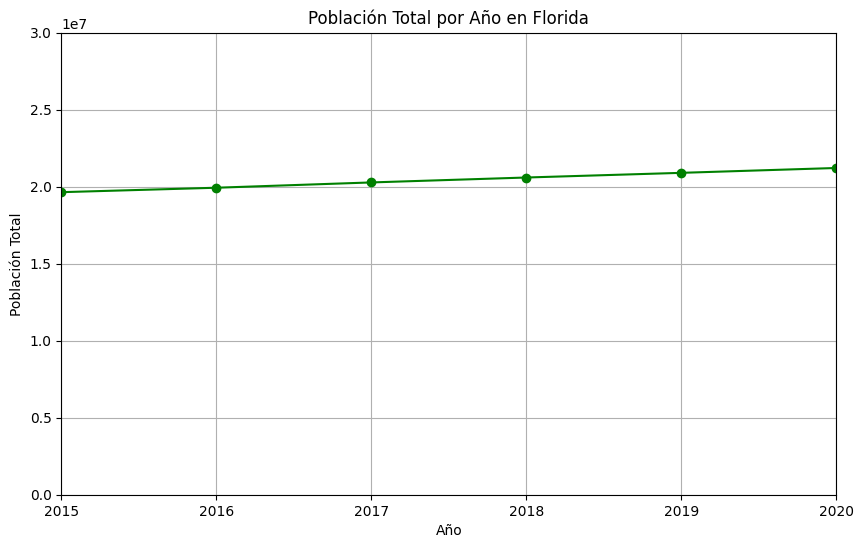

In [27]:
# Conversión de tipos 
df_census_florida['total_population'] = pd.to_numeric(df_census_florida['total_population'])
df_census_florida['year'] = pd.to_numeric(df_census_florida['year'])

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6)) 
plt.plot(df_census_florida['year'], df_census_florida['total_population'], color='green', marker='o')

# Personalizar el gráfico
plt.title('Población Total por Año en Florida')
plt.xlabel('Año')
plt.ylabel('Población Total')
plt.grid(True)

# Limitar el rango de los ejes
plt.xlim(2015, 2020)
plt.ylim(0, 30000000)

plt.show()

In [28]:
# Filtramos por Pennsylvania
Pennsylvania = 'Pennsylvania'
df_census_Pennsylvania = df_census.loc[df_census['NAME'] == Pennsylvania]
df_census_Pennsylvania

,NAME,total_population,state,year
14,Pennsylvania,12779559,42,2015
14,Pennsylvania,12783977,42,2016
19,Pennsylvania,12790505,42,2017
14,Pennsylvania,12791181,42,2018
38,Pennsylvania,12791530,42,2019
0,Pennsylvania,12794885,42,2020


In [29]:
df_census_Pennsylvania = df_census_Pennsylvania.dropna()

# Verificar los tipos de datos
print(df_census_Pennsylvania.dtypes)

NAME                object
total_population     int32
state               object
year                object
dtype: object


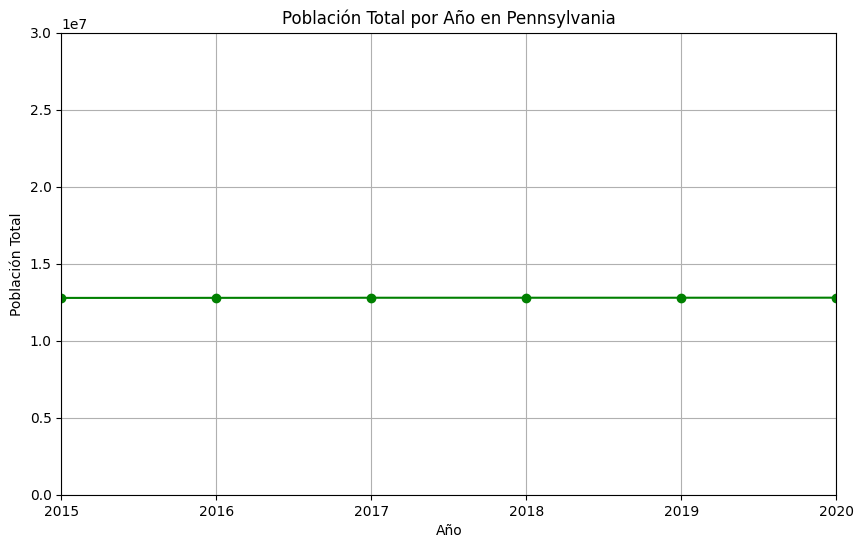

In [30]:
df_census_Pennsylvania['total_population'] = pd.to_numeric(df_census_Pennsylvania['total_population'])
df_census_Pennsylvania['year'] = pd.to_numeric(df_census_Pennsylvania['year'])

# Crear el gráfico de línea con Matplotlib
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si lo deseas
plt.plot(df_census_Pennsylvania['year'], df_census_Pennsylvania['total_population'], color='green', marker='o')

# Personalizar el gráfico
plt.title('Población Total por Año en Pennsylvania')
plt.xlabel('Año')
plt.ylabel('Población Total')
plt.grid(True)

# Limitar el rango de los ejes
plt.xlim(2015, 2020)
plt.ylim(0, 30000000)

plt.show()

In [31]:
# Filtramos por Tennessee
Tennessee = 'Tennessee'
df_census_Tennessee = df_census.loc[df_census['NAME'] == Tennessee]
df_census_Tennessee

,NAME,total_population,state,year
18,Tennessee,6499615,47,2015
18,Tennessee,6548009,47,2016
23,Tennessee,6597381,47,2017
18,Tennessee,6651089,47,2018
42,Tennessee,6709356,47,2019
51,Tennessee,6772268,47,2020


In [32]:
df_census_Tennessee = df_census_Tennessee.dropna()

# Verificar los tipos de datos
print(df_census_Tennessee.dtypes)

NAME                object
total_population     int32
state               object
year                object
dtype: object


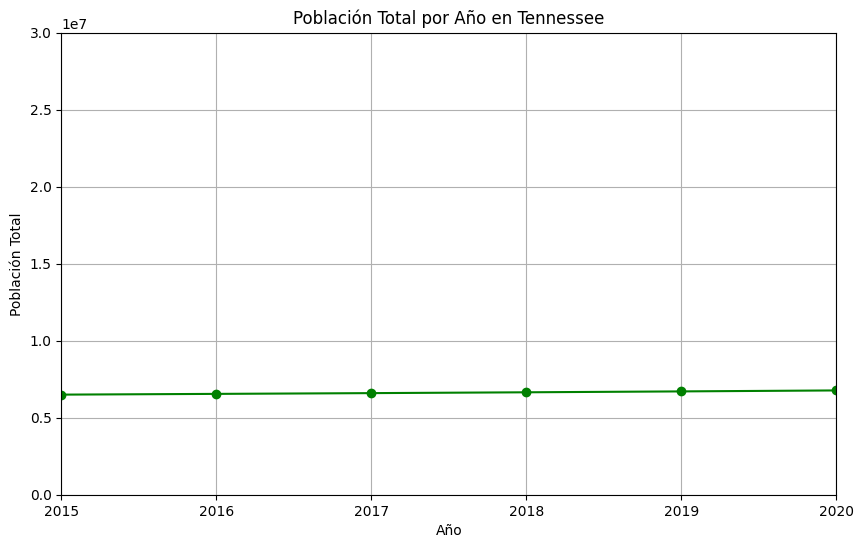

In [33]:
df_census_Tennessee['total_population'] = pd.to_numeric(df_census_Tennessee['total_population'])
df_census_Tennessee['year'] = pd.to_numeric(df_census_Tennessee['year'])

# Crear el gráfico de línea con Matplotlib
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si lo deseas
plt.plot(df_census_Tennessee['year'], df_census_Tennessee['total_population'], color='green', marker='o')

# Personalizar el gráfico
plt.title('Población Total por Año en Tennessee')
plt.xlabel('Año')
plt.ylabel('Población Total')
plt.grid(True)

# Limitar el rango de los ejes
plt.xlim(2015, 2020)
plt.ylim(0, 30000000)

plt.show()

In [34]:
df_census_total = pd.concat([df_census_Pennsylvania, df_census_Tennessee, df_census_florida], axis=0)

In [35]:
df_census_total.head()

,NAME,total_population,state,year
14,Pennsylvania,12779559,42,2015
14,Pennsylvania,12783977,42,2016
19,Pennsylvania,12790505,42,2017
14,Pennsylvania,12791181,42,2018
38,Pennsylvania,12791530,42,2019


In [36]:
#df_census_total.to_parquet('census_data.parquet', index=False)